In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
pd.set_option('max_colwidth',200)

**数据收集**

In [2]:
#用pd.read_csv来读取twitter-archive-enhanced.csv内的信息并保存到twitter_archive_enhanced中
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#利用requests库来下载文件，并保存到image-predictions.tsv中
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1],'wb') as f:
    f.write(r.content)
#用pd.read_csv来读取image-predictions.tsv内的信息并保存到image_predictions中
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
#建一个空的列表，用来保存信息，并在之后用于转换成t_data
#这里的json文件直接使用了优达学城提供的数据
t_data_list = []
with open('tweet_json.txt') as f:
    for line in f:
        """"
        这里用正则表达式来提取json文件中的相应字段
        观察json文件，以第一行为例：
        "id": 892420643555336193 "retweet_count": 8842, "favorite_count": 39492
        所使用的三个字段分别以上面的形式给出，因此对应的正则表达式pattern可以分别写作
        r'"id": \d+'
        r'"retweet_count"
        r'"favorite_count": \d+'
        之后进行提取
        """
        i_d = str(re.search(r'"id": \d+',line).group(0)[6:])
        retweetCount = int(re.search(r'"retweet_count": \d+',line).group(0)[17:])
        favoriteCount = int(re.search(r'"favorite_count": \d+',line).group(0)[18:])
        """
        储存到list中
        """
        t_data_list.append({'tweet_id':i_d,
                       'retweet_count':retweetCount,
                       'favorite_count':favoriteCount})
        """
        转换
        """
t_data = pd.DataFrame(t_data_list,columns=['tweet_id','retweet_count','favorite_count'])

<font color=red>尝试使用简便方法中的read_json方法</font>

In [5]:
#尝试使用read_json方法
t_data1 =  pd.read_json('tweet_json.txt',lines=True)
t_data1 = t_data1[['id', 'retweet_count', 'favorite_count']].copy()
t_data1.rename(columns = {'id':'tweet_id'})
t_data1

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


**数据评估**

In [6]:
#显示twitter_archive_enhanced中的前30行
twitter_archive_enhanced.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [7]:
#显示twitter_archive_enhanced中的后30行
"""
1.观察了前后30行发现，source列中还保留着html标签。  
2.在retweeted_status_user_id列中发现了不为零的项，需要在info()信息中确认有多少转发。
3.与stage相关的列有大量缺失。
"""
twitter_archive_enhanced.tail(30)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126856765440/photo/1,7,10,a,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10 https://t.co/Dc7b0E8qFE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247373291520/photo/1,9,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753744588802/photo/1,11,10,None,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758909284353/photo/1,6,10,None,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288456101888/photo/1,8,10,None,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417576210432/photo/1,10,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9,10,an,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/statu

In [8]:
#显示twitter_archive_enhanced的info
"""
从这里可以发现：  
1.tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp等列的数据类型存在问题。  
2.in_reply_to_status_id,in_reply_to_user_id两列缺失值过多，应该删除。
3.retweeted_status_id等与转发相关的列不为空白，说明存在表中转发的情况，需要删除。
4.doggo,floofer,pupper,puppo等代表狗的stage的列不应该单独存在，应该合并起来。
5.expanded_urls有缺失项。
"""
twitter_archive_enhanced.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#统计评分为小数，并且不是转发twitter
twitter_archive_enhanced_ = twitter_archive_enhanced.loc[twitter_archive_enhanced.text.str.extract(r'(\d+\.\d+/)',re.S,expand=True).notnull()[0]]
twitter_archive_enhanced_.loc[twitter_archive_enhanced_.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [11]:
twitter_archive_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Toby          7
Bailey        7
Daisy         7
Buddy         7
Koda          6
Leo           6
Jax           6
Oscar         6
Bella         6
Scout         6
Jack          6
Dave          6
Stanley       6
Rusty         6
Milo          6
Larry         5
           ... 
Bobby         1
Bradley       1
Evy           1
Kulet         1
Tito          1
Lucia         1
Alfy          1
Beckham       1
Mo            1
Georgie       1
Staniel       1
Tuco          1
Tove          1
Darla         1
Dook          1
Kevon         1
Pubert        1
Blakely       1
Wiggles       1
Carper        1
Sephie        1
Kial          1
Grey          1
Tino          1
Glacier       1
Finnegus      1
Edmund        1
Toffee        1
Shikha        1
Crimson       1
Name: name, Length: 957,

In [12]:
#显示image_predictions中的前10行
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [14]:
#显示image_predictions的info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#显示t_data中的前10行
t_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [17]:
#显示t_data中的描述统计学
t_data.describe()

,retweet_count,favorite_count
count,2352.000000,2352.000000
mean,3207.997449,9755.457058
std,5586.909911,14039.329875
min,0.000000,52.000000
25%,617.000000,2038.500000
50%,1454.500000,4437.500000
75%,3628.750000,12492.250000
max,79116.000000,228370.000000


In [18]:
#显示t_data的info
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [19]:
sum(image_predictions.tweet_id.duplicated())

0

In [20]:
twitter_archive_enhanced.rating_denominator.value_counts()
"""
从这里可以发现评分列中存在着各种分母不为10的情况，需要观察。
"""

'\n从这里可以发现评分列中存在着各种分母不为10的情况，需要观察。\n'

In [21]:
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_denominator==150,'tweet_id']

902    758467244762497024
Name: tweet_id, dtype: int64

In [22]:
twitter_archive_enhanced[twitter_archive_enhanced['tweet_id']==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


**数据质量：**  
**twitter_archive_enhanced表**  
1.包含转发的信息。  
2.expanded_urls有缺失项。  
3.有些狗的明字是the/a/an这些显然不太可能的名字。  
4.stage列中存在大量缺失了。  
5.source列中有不需要的html标签。  
6.in_reply_to_status_id,in_reply_to_user_id缺失项过多需要删除。  
7.评分列中存在着各种分母不为10的情况，需要观察。         
8.存在个别评分分子为小数。    
9.tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp等列的数据类型存在问题。  
**image_predictions表**  
10.image_predictions表中的图片url存在重复。  
11.tweet_id列的数据类型不正确。  
**t_data表**  
未发现  
**数据整洁度：**  
1.代表狗stage的变量这个本来只需要一列的变量，在四列中表示了。  
2.应该将image_predictions与t_data这两个表格应该与twitter_archive_enhanced合并。  
**清洗中发现的问题：**  
发现text中存在&amp这个html的用于表示&的信息，需要删除。

**数据清洗**

In [23]:
#复制数据集,将twitter_archive_enhanced复制到为main_clean
main_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
t_data_clean = t_data.copy()

**定义：删除转发的信息**

**代码**

In [24]:
#删除转发信息
main_clean = main_clean.loc[main_clean.retweeted_status_id.isnull()]
main_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

**测试**

In [25]:
#检查删除结果
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


**定义：删除expanded_urls缺失的行**

**代码**

In [26]:
#删除expanded_urls缺失的行
main_clean = main_clean.loc[main_clean.expanded_urls.notnull()]

**测试**

In [27]:
#检查删除结果
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


**定义：将name列中的a,the,an,None等名字转换为np.nan**

**代码**

In [28]:
#将a,the,an等名字转换为np.nan
replace=['a','the','an','None']
for name in replace:
    main_clean['name'] = main_clean['name'].replace(name,np.nan)

**测试**

In [29]:
#检查结果
main_clean['name'].value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Stanley       6
Oscar         6
Bo            6
Bella         6
Koda          6
Jax           6
Bailey        6
Milo          5
Buddy         5
Scout         5
Rusty         5
Louis         5
Leo           5
Bentley       5
Chester       5
Dave          5
Chip          4
Clark         4
Finn          4
             ..
Sweets        1
Meera         1
Pavlov        1
Enchilada     1
Emmy          1
Dewey         1
Linus         1
Jimbo         1
Amy           1
Timmy         1
Molly         1
Lillie        1
Tebow         1
Dunkin        1
Farfle        1
Creg          1
Ralphie       1
Margo         1
Boots         1
Biden         1
Lugan         1
Klein         1
Hanz          1
Deacon        1
Stu           1
Vixen         1
Logan         1
Gin           1
Bobble        1
Samsom        1
Name: name, Length: 952,

**定义：text中提取与stage有关的信息，并合并成一列<font color=red>(使用修改意见中的从text中提取的方法)</font>**  

**代码**

In [30]:
#将stage有关的信息并合并成一列
main_clean['stage'] = main_clean.text.str.lower().str.findall(r'(doggo|floof|pupper|puppo)')
main_clean['stage'] = main_clean.stage.apply(lambda x:set(x))
main_clean['stage'] = main_clean.stage.apply(lambda x:'|'.join(x))
main_clean['stage'] = main_clean.stage.replace('',np.nan)
main_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace = True)

**测试**

In [31]:
#检查结果
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1426 non-null object
stage                    404 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 198.5+ KB


**定义：删除source列中的html标签**

**代码**

In [32]:
#删除source列中的html标签
main_clean['source'] = main_clean.source.str.extract(r'>(.*)<',re.S,expand=True)

**测试**

In [33]:
#检查结果
main_clean['source'].value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

**定义：删除in_reply_to_status_id,in_reply_to_user_id列**

**代码**

In [34]:
#删除in_reply_to_status_id,in_reply_to_user_id列
main_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

**测试**

In [35]:
#检查结果
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1426 non-null object
stage                 404 non-null object
dtypes: int64(3), object(6)
memory usage: 165.4+ KB


**定义：从text中察看评分列中存在着各种分母不为10的行的具体情况<font color=red>(使用修改意见中stage的修改方法后，此处的行的index变了，对于新的index重新进行了赋值操作)</font>**

**代码**

In [36]:
#尝试了set_option显示了整行方便了许多 以后清洗中尝试使用
main_clean.loc[main_clean.rating_denominator!=10,['text','rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


In [37]:
#提取分母不为10的数据
a_copy = main_clean.loc[main_clean.rating_denominator!=10,'text']
for i in a_copy.index:
    print("{}:".format(i)+a_copy[i])

433:The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516:Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902:Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068:After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1120:Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165:Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202:This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228:Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254:Here's a brigade of puppers. All look very prepared for whatever happen

从观察中可以发现，433，902，1120，1016，1228，1254，1274，1351，1433，1634，1635，1779,1843的分母大于10并没有问题，因为这些都是因为不止有一只狗造成的原因。  
516也没有问题，因为给的评分就是24/7。  
1068存在问题，9/11并不是这只狗的分数，实际分数14/10。  
1165存在问题，实际的分数是13/10。  
1202存在问题，实际的分数是11/10。  
1662存在问题，实际分数是10/10。  
2335存在问题，实际分数是9/10。    
同时发现text中存在amp;这个html的用于表示&的信息，需要删除。

In [38]:
#对于评分进行更改
dic={1068:[14,10],1165:[13,10],1202:[11,10],1662:[10,10],2335:[9,10]}
for key,value in dic.items():
    main_clean.loc[key,['rating_numerator','rating_denominator']] = dic[key]

**测试**

In [39]:
#检查修改
for key in dic.keys():
    print(main_clean.loc[key,['rating_numerator','rating_denominator']])

rating_numerator      14
rating_denominator    10
Name: 1068, dtype: object
rating_numerator      13
rating_denominator    10
Name: 1165, dtype: object
rating_numerator      11
rating_denominator    10
Name: 1202, dtype: object
rating_numerator      10
rating_denominator    10
Name: 1662, dtype: object
rating_numerator       9
rating_denominator    10
Name: 2335, dtype: object


**定义：对于text中的amp;进行删除**

**代码**

In [40]:
#对于text中的amp;进行删除
main_clean['text'] = main_clean.text.str.replace("&amp;","")

**测试**

In [41]:
#检查结果
main_clean[main_clean.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


**定义：修改tweet_id,timestamp列的数据类型**

**代码**

In [42]:
#修改tweet_id,timestamp列的数据类型
main_clean['tweet_id'] = main_clean.tweet_id.astype(str)
main_clean['timestamp'] = pd.to_datetime(main_clean.timestamp)

**测试**

In [43]:
#检查结果
main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1426 non-null object
stage                 404 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 245.4+ KB


**定义：将rating_numerator类型改为float，并且修改评分分子为小数的数据**  

**代码**

In [44]:
#此处也一样使用了可以完全显示了
main_clean.loc[main_clean.text.str.extract(r'([;\s(]([0-9]+?/[0-9]+)|(^[0-9]+?/[0-9]+)|(\.\.\.[0-9]+?/[0-9]+)|(\D\.[0-9]+?/[0-9]+))',re.S,expand=True).isnull()[0],'text']

45                               This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
695                                      This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712                                                           Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object

In [45]:
#修改类型，察看text中的原始数据,用main_clean_clean_float来储存分子为小数的行
main_clean['rating_numerator'] = main_clean.rating_numerator.astype(float)
main_clean_float = main_clean.loc[main_clean.text.str.extract(r'([;\s(]([0-9]+?/[0-9]+)|(^[0-9]+?/[0-9]+)|(\.\.\.[0-9]+?/[0-9]+)|(\D\.[0-9]+?/[0-9]+))',re.S,expand=True).isnull()[0]]
for i in main_clean_float.index:
    print('{}:'.format(i)+main_clean_float.loc[i].text)

45:This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
695:This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763:This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712:Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [46]:
#由上面得到的数值，对相应的行进行修改
dic = {45:13.5,695:9.75,763:11.27,1712:11.26}
for index,val in dic.items():
    main_clean.loc[index,"rating_numerator"]=dic[index]

**测试**

In [47]:
#检查结果
for index in dic.keys():
    print(main_clean.loc[index,"rating_numerator"])

13.5
9.75
11.27
11.26


**定义：删除image_predictions表中重复的url**

**代码**

In [48]:
#删除图片url的重复
image_predictions_clean.drop_duplicates('jpg_url',inplace=True)

**检查**

In [49]:
#检查结果
sum(image_predictions_clean.jpg_url.duplicated())

0

**定义：修改image_predictions_clean中修改tweet_id列的数据类型**

**代码**

In [50]:
#修改tweet_id列的数据类型
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

**测试**

In [51]:
#检查结果
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


**定义：合并三个数据集**

**代码**

In [52]:
#合并三个数据集
df_clean = main_clean.merge(image_predictions_clean,how='inner',on='tweet_id')
df_clean = df_clean.merge(t_data,how='left',on='tweet_id')

**测试**

In [53]:
#察看合并后结果
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1380 non-null object
stage                 369 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non

In [54]:
#察看合并后结果
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


**数据存储**

In [55]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

**数据分析和可视化**

**提出问题：**  
1.favorite_count与retweet_count之间存在什么关系吗？  
2.在数据已知的stage中，哪个stage占比最高？  
3.从神经网络的结果中，哪个种类的狗最受欢迎？  
4.能判别性别的狗中，是公的多还是母的多？  

In [56]:
#导入数据
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1380 non-null object
stage                 369 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int

**1.favorite_count与retweet_count之间存在什么关系吗？**

Text(0.5,1,'relationship between favorite_count and retweet_count')

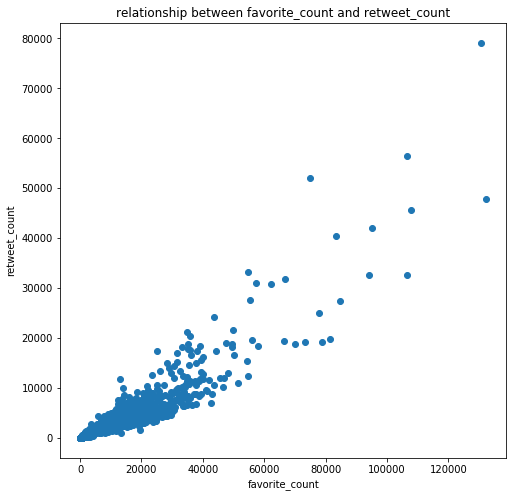

In [57]:
plt.figure(figsize=(8,8)) 
plt.scatter(df['favorite_count'],df['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('relationship between favorite_count and retweet_count')

从图中可以发现favorite_count与retweet_count有很强的正相关性，favorite_count数越高，retweet_count也相应越高。

Text(0.5,1,'Correlation Map')

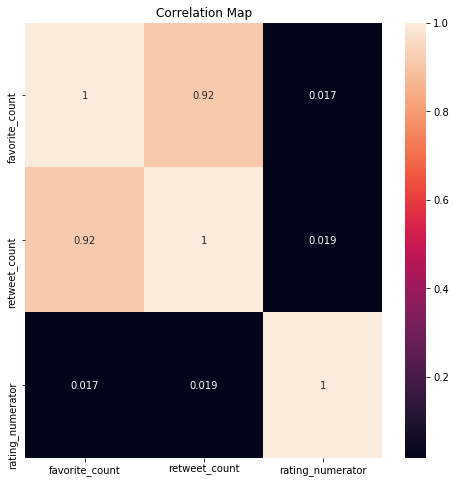

In [58]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df[['favorite_count','retweet_count','rating_numerator']].corr(),annot=True,ax=ax)
plt.title('Correlation Map')

从相关性图中，可以发现favorite_count与retweet_count的相关系数到达了0.92这个接近1的数值，更加说明了两者之间强的正相关性。同时，两者与rating nummerator的相关系数较小，说明没有明显的线形关系。

**2.在数据已知的stage中，哪个stage占比最高？(<font color=red>更新数据后将图标更新)</font>**

In [59]:
#将有多个状态的狗地数据变成多行并保存到stage_count中，并将index保存到labels中
stage_count = df.stage.str.split('|',expand=True).stack().value_counts()
labels = df.stage.str.split('|',expand=True).stack().value_counts().index.tolist()

Text(0.5,1,'pie of stage')

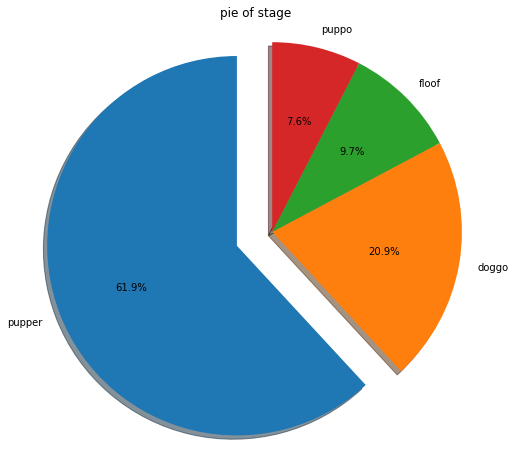

In [60]:
plt.figure(figsize=(8,8))
explode = (0.2,0,0,0)
plt.pie(stage_count,labels=labels,explode = explode,autopct = '%3.1f%%',shadow = True,startangle = 90)
plt.axis('equal')
plt.title('pie of stage')

可以看出在已知的stage中，pupper占最多的比例。

**3.从神经网络的结果中，哪个种类的狗最受欢迎？**

In [61]:
#提取狗的种类
count = []
for index in df.index:
    if df.loc[index]['p1_dog'] == True:
        count.append(df.loc[index]['p1'])
    elif df.loc[index]['p2_dog'] == True:
        count.append(df.loc[index]['p2'])
    elif df.loc[index]['p3_dog'] == True:
        count.append(df.loc[index]['p3'])
count = pd.Series(count)
count_top10 = count.value_counts()[:10]
count_top10

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
dtype: int64

Text(0.5,1,'top10 famous dogs')

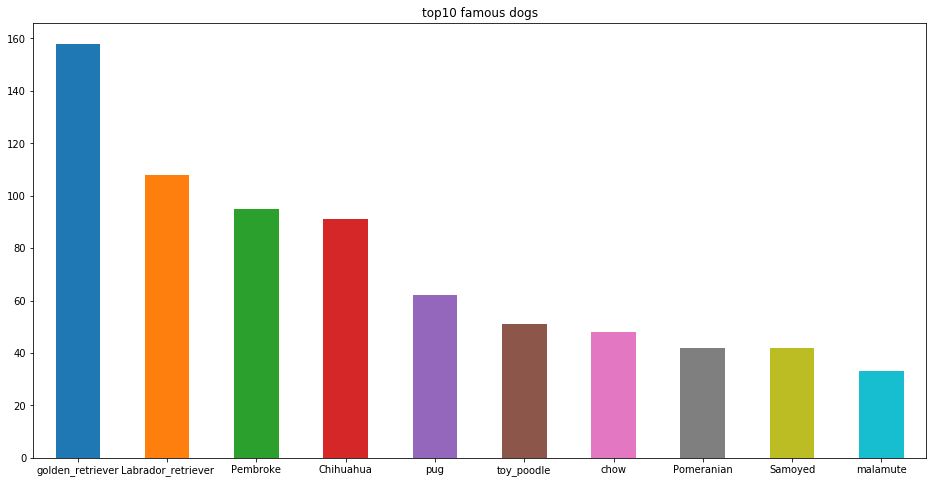

In [62]:
count_top10.plot(kind = 'bar',figsize=(16,8),rot=0,)
plt.title('top10 famous dogs')

从表中可以看出大家都喜欢金毛猎犬和拉不拉多犬这类性格温顺又聪明的狗。

**4.能判别性别的狗中，是公的多还是母的多？**  

In [63]:
#提取狗的性别
g_male = ['He','he','His','his','him',"he's","He's",'himself']
g_female = ['She','she','Her','her',"she's","She's",'herself']
gender=[]
for str_ in df['text']:
    if any(map(lambda x:x in g_male,str_.split())):
        gender.append ('male')
    elif any(map(lambda x:x in g_female,str_.split())):
        gender.append ('female')
gender = pd.Series(gender)
gender.value_counts()

male      1007
female     337
dtype: int64

Text(0.5,1,'pie of sex of dogs')

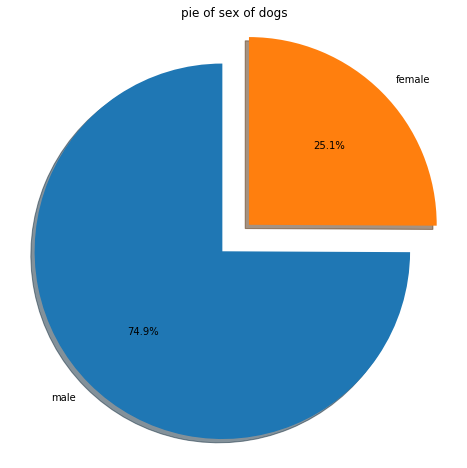

In [64]:
#进行绘图
plt.figure(figsize=(8,8))
labels = ['male','female']
explode = (0.2,0)
plt.pie(gender.value_counts(),labels=labels,explode = explode,autopct = '%3.1f%%',shadow = True,startangle = 90)
plt.axis('equal')
plt.title('pie of sex of dogs')

从这个结果可以看出公狗占大多数。